# Load in libraries and functions

In [2]:
sys.path.insert(0, '/home/566/nd0349/notebooks/functions')
from plotting import create_map_axis, plot_style, add_subplot_label, set_ax_date
from functions import cyclic_moving_av
from PIL import Image
import sys
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
import IPython.display

def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        Bar = "[{}] {:.0f}% {}".format(ProgressIcon * Block + BarIcon * (BarLength - Block), round(Progress * 100, 0), Status)
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()
    
def make_gif(frame_folder, gifname, yr, dframe):
    frames = [Image.open(image) for image in sorted(glob.glob(f"{frame_folder}/*.png"))[0:len(glob.glob(f"{frame_folder}/*.png")):dframe]]
    frame_one = frames[0]
    frame_one.save(gifname + str(yr) + ".gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)

In [ ]:
# import numpy as np
# import xarray as xr
# import pandas as pd
# import os
# import glob
# from PIL import Image
# import sys
# from tqdm import tqdm
# from os import listdir
# from os.path import isfile, join
# import IPython.display

# # Plotting
# import scienceplots
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm
# import matplotlib.colors as colors
# import matplotlib as mpl
# import cmocean.cm as cmo
# import cartopy.crs as ccrs
# import cartopy.feature as cft
# import matplotlib.dates as mdates
# import plotly.express as px
# from matplotlib.ticker import NullFormatter
# from matplotlib import rc
# import seaborn as sns
# import matplotlib.transforms as mtransforms
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# import cartopy.feature as cfeature
# import cartopy.crs as ccrs
# import cartopy.mpl.ticker as cticker
# from cartopy.util import add_cyclic_point
# import matplotlib.transforms as mtransforms
# import seaborn as sns
# import matplotlib.path as mpath
# import matplotlib.ticker as mticker
# from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
#                                 LatitudeLocator)
# import cartopy.feature as cfea






In [3]:
year = 2019
COLOR_MIZ = [0.9805, 0.5000, 0.4453, 1.0]
COLOR_FSD = sns.color_palette("colorblind",15)[2]
COLOR_WAVE = sns.color_palette("colorblind",15)[3]
COLOR_IAGE = sns.color_palette("colorblind",15)[4]
COLOR_INTERIOR = sns.color_palette("colorblind",15)[0]

# Plot settings
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
textwidth = 3.31314*2
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio

#plt.style.use("seaborn")


plt.style.use('default')
plt.style.use(['science','ieee', 'grid'])
sns.set_context("paper")
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
font_size = 14
mpl.rcParams.update({'font.size': font_size})
mpl.rcParams.update({"axes.grid" : True, "grid.color": [0.6, 0.6, 0.6]})
sns.color_palette("colorblind",15)

COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

filename = '/g/data/ia40/sea-ice-classification/kmean_2019.nc'
ds_mask = xr.open_dataset(filename)
LT = ds_mask['LAT']
LN = ds_mask['LON']
land_mask = ds_mask['tmask'].where(ds_mask['tmask'][:,:] != 1.) 
del ds_mask

# Make a map

ax1 done
ax2 done
ax3 done


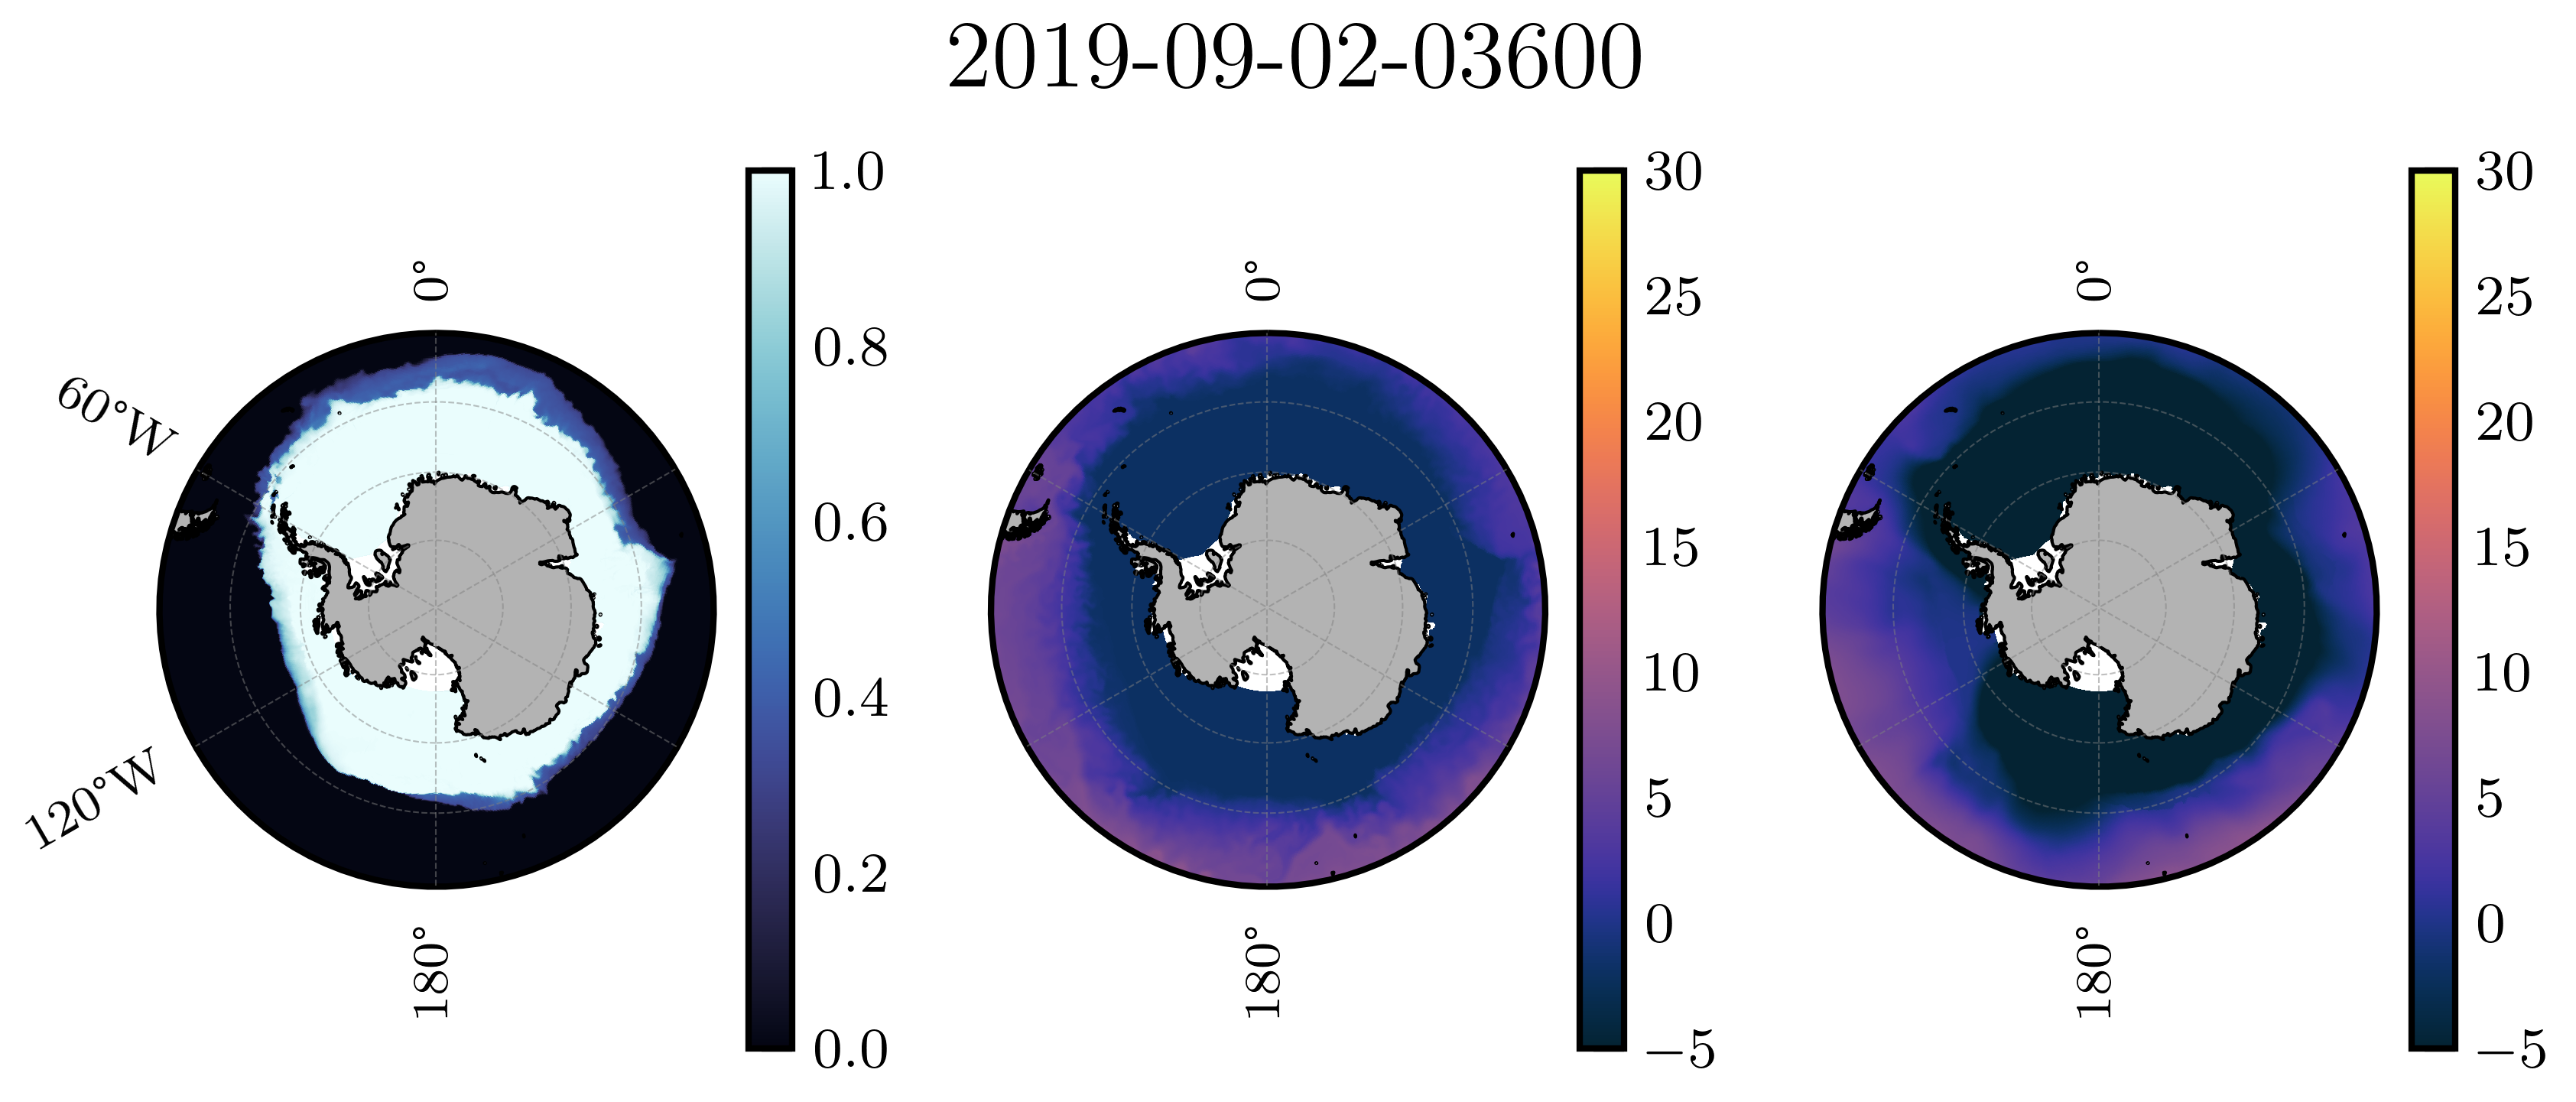

In [18]:
###### year = 2019
#mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/' #'/g/data/dy43/cice-dirs/runs/nowaves/history/' + year
#mypath = '/g/data/ia40/cice-dirs/runs/waves-025-2019/history/'
mypath = '/g/data/ia40/cice-dirs/runs/waves-025-2019/history/'
mypath_d = '/g/data/ia40/cice-dirs/runs/waves-025-2019/history/'
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#filenames = sorted(onlyfiles)
filename = mypath + 'iceh_01h.' + str(year) + '-09-02-03600.nc'
filename_d = mypath_d + 'iceh.' + str(year) + '-09-02.nc'
#filename = mypath + 'iceh.' + str(year) + '-09-01.nc'

ds = xr.open_dataset(filename)
fig = plt.figure(figsize=[width, height/2])
ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())

var = 'aice'
ax1 = create_map_axis(ax=ax1, LN=LN, LT=LT, land_mask=land_mask, draw_labels="left", textcolor=COLOR)
cs = ax1.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice, vmin=0, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Ice concentration [-]')

print('ax1 done')



ds = xr.open_dataset(filename_d)

var = 'sst_d'
ax2 = create_map_axis(ax=ax2, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle", textcolor=COLOR)
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.thermal, vmin=-5, vmax=30)#, norm = colors.LogNorm(vmin=0, vmax=350))
fig.colorbar(cs, ax=ax2)

print('ax2 done')

var = 'Tair_d'
ax2 = create_map_axis(ax=ax3, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle", textcolor=COLOR)
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.thermal, vmin=-5, vmax=30)#, norm = colors.LogNorm(vmin=0, vmax=350))
fig.colorbar(cs, ax=ax3)

print('ax3 done')


temp = filename.partition('.')[2]
fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)

sys.stdout.flush()


plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'waves-025-2019' + '-' + temp.partition('.')[0]+'.png', dpi = 300, transparent=True)
#plt.savefig(temp.partition('.')[0]+'-'+var_name+'.png', dpi = 100)  
# print('Image saved!')
plt.show()


In [9]:
ds

<xarray.Dataset>
Dimensions:         (time: 1, d2: 2, nj: 1080, ni: 1440, nc: 5, nkaer: 5, nf: 12)
Coordinates:
  * time            (time) datetime64[ns] 2019-09-02
    TLON            (nj, ni) float32 ...
    TLAT            (nj, ni) float32 ...
    ULON            (nj, ni) float32 ...
    ULAT            (nj, ni) float32 ...
    NCAT            (nc) float32 ...
Dimensions without coordinates: d2, nj, ni, nc, nkaer, nf
Data variables: (12/92)
    time_bounds     (time, d2) datetime64[ns] ...
    VGRDa           (nkaer) float32 ...
    NFSD            (nf) float32 ...
    tmask           (nj, ni) float32 ...
    blkmask         (nj, ni) float32 ...
    tarea           (nj, ni) float32 ...
    ...              ...
    vsnon_d         (time, nc, nj, ni) float32 ...
    ardgn_d         (time, nc, nj, ni) float32 ...
    aredistn_d      (time, nc, nj, ni) float32 ...
    vredistn_d      (time, nc, nj, ni) float32 ...
    araftn_d        (time, nc, nj, ni) float32 ...
    vraftn_d        (time, nc, nj, ni) float32 ...
Attributes:
    title:        sea ice model output for CICE
    contents:     Diagnostic and Prognostic Variables
    source:       Los Alamos Sea Ice Model, CICE_6.2.0
    comment:      This year has 365 days
    comment2:     File written on model date 20190902
    comment3:     seconds elapsed into model date:      0
    conventions:  CF-1.0
    history:      This dataset was created on 2023-08-25 at 09:33:59.8
    io_flavor:    io_netcdf

# Make a movie

In [ ]:
year = 2019
mypath = '/g/data/ia40/cice-dirs/runs/waves-025-2019/history/' #'/g/data/dy43/cice-dirs/runs/nowaves/history/' + year
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filenames = sorted(onlyfiles)
#filenames = filenames[0:365:1]
#filenames

for file in filenames:
        if file.startswith("iceh."+str(year)):
            print(file)

In [ ]:
#mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history' #'/g/data/dy43/cice-dirs/runs/nowaves/history/' + year
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f)) if f.startswith("iceh."+str(year))]
filenames = sorted(onlyfiles)
#filenames = filenames[0:24:1]
plot_dir = '/home/566/nd0349/notebooks/figures/gif'
year = 1998
filenames = filenames[-1:]
var = 'aice'
print(filenames[0])
print(filenames[-1])


for i, f in tqdm(enumerate(filenames), total = len(filenames), desc='Plotting frames'):
    if f.startswith("iceh."+str(year)):
        filename = mypath + '/' + f
        ds = xr.open_dataset(filename)
        
        fig = plt.figure(figsize=[width/2, height/2])
        ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
        ax = create_map_axis(ax=ax, LN=LN, LT=LT, land_mask=land_mask, draw_labels="all", textcolor=COLOR)
        

        
        cs = ax.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                            transform=ccrs.PlateCarree(), shading = 'auto',
                            cmap=cmo.ice, vmin = 0, vmax = 1, #norm = colors.LogNorm(vmin=0, vmax=1)
                           )
        
        # COLORBAR
        pos1 = ax.get_position()
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
        cb = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
        cb.set_label('Sea ice concentration [-]', color=COLOR) # set colorbar label plus label color
        cb.ax.yaxis.set_tick_params(color=COLOR) # set colorbar tick color
        cb.outline.set_edgecolor(COLOR) # set colorbar edgecolor 
        plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color=COLOR) # set colorbar ticklabels
        #cb.ax.majorticks_on()
        cb.ax.minorticks_on()
        cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        

        #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])
        #cb = plt.colorbar(p1, cax=ax_cb, orientation='vertical')
        #ax_cb = plt.axes([0.85, 0.15, 0.03, 0.7])
        #cb = plt.colorbar(p1, orientation='vertical')
        #cb.ax.set_ylabel('Zonal velocity (m/s)');

        temp = filename.partition('.')[2]
        fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
        plt.savefig(plot_dir + '/' + var + '-' + temp.partition('.')[0]+'.png', dpi = 450, transparent=True)
        plt.close(fig)
        
#        plt.close(fig)
        # Delete the Figure object
#        del fig
        # plt.savefig(temp.partition('.')[0]+'-'+var_name+'.png', dpi = 100)  
       # print('Image saved!')
        #plt.show()


In [ ]:
frame_folder = '/home/566/nd0349/notebooks/figures/gif/'
#var = 'fsdrad'
#make_gif(plot_dir, var, 1998, 1)
year = 2019
dframe = 1
gifname = frame_folder + '/' + var + '-'
sorted_frames = sorted(glob.glob(f"{frame_folder}/"+var+"-"+str(year)+"*.png"))
frames = [Image.open(image) for image in sorted_frames[0:len(sorted_frames):dframe]]
frame_one = frames[0]
frame_one.save(gifname + str(year) + ".gif", format="GIF", append_images=frames,
           save_all=True, duration=30, loop=0, transparency=0, disposal=2)

# SIA Timeseries

In [3]:
def get_ice_region(filename, var, region="SH-aice"):
    ds = xr.open_dataset(filename)
#    aice_data = ds.aice
    lat = ds.TLAT
    var_data = ds[var]
    var_data_south = var_data.where(lat<0, drop=True).squeeze()
    aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() # First take only the southern hemisphere
    if region == "SH-aice":
        # Southern Hemisphere and Ice edge
        var_data_out = var_data_south.where(aice_south>0.15, drop=True)
    elif region == "SH":
        # Southern Hemisphere
        var_data_out = var_data_south
    return var_data_out

def integrate_area(filename, var):
    # Integrate over Southern Hemisphere
    var_data_out = get_ice_region(filename, var, 'SH')
    weights = get_ice_region(filename, 'tarea', 'SH')
    weights.name = "Areal weights"
    var_data_weighted = var_data_out.weighted(weights)
    
    return (var_data_weighted.sum(("nj", "ni")).values)
    

In [ ]:
plt.rcParams['text.usetex'] = False

mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
year = 2019
# Start
os.chdir(mypath)

filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
var = 'tarea'
aice_out = get_ice_region(filename, var)
aice_out.plot()
#set

In [ ]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
year = 2019
# Start
os.chdir(mypath)

filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'
ds = xr.open_dataset(filename)
aice = ds['aice']
lat = ds.TLAT
dA = ds.tarea
dA_south = dA.where(lat<0, drop=True)
aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() # First take only the southern hemisphere
aice_only= aice_south.where(aice_south>0.15, drop=True) # Then take the SIA
pixel_area = aice_only
#dA_south.where(aice_south<0.15, drop=True)
pixel_area.plot()



### Calculate the SIA from CICE-WIM output

In [ ]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
year = 2019

# Start
os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'

onlyfiles = glob.glob("{path}/iceh.*".format(path=mypath))
onlyfiles.sort()

ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
lat_idx = LT[:,0] < 0
onlyfiles = onlyfiles#[0:365]
# Initialise arrays
n_lon,n_lat = LN.shape
n_days = len(onlyfiles)
print(n_days)
SIA = np.empty((n_days))

# Open the file
for idx, file in tqdm(enumerate(onlyfiles), total = len(onlyfiles)):
    #print(file)
    file_dates.append(np.datetime64(file[-13:-3]))
    ds = xr.open_dataset(file)
    aice = ds.aice
    lat = ds.TLAT
    dA = ds.HTE
    dA_south = dA.where(lat<0, drop=True)
    # First take only the southern hemisphere
    aice_south = (ds.aice.where(lat<0, drop=True)).squeeze() 
    # Then take all ice exceeding the ice edge
    aice_only= aice_south.where(aice_south>0.15, drop=True) 

    tarea_south = (ds.tarea.where(lat<0, drop=True))
    tarea_aice_only = tarea_south.where(aice_south>0.15, drop=True)
    weights = tarea_south#np.multiply(hte_south, aice_south)
    weights.name = "Areal weights"

    aice_weighted = aice_south.weighted(weights)
    SIA[idx] = (aice_weighted.sum(("nj", "ni")).values)/(10**12)
#    print((aice_weighted.sum(("nj", "ni")).values)/(10**12))

In [ ]:
df = pd.DataFrame({"date": file_dates,
                   "SIA": SIA,
                    })
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['month-day'] = dates.strftime('%m-%d')
df.drop(df[df['month-day'] == '02-29'].index, inplace = True)
df['month-day'] = pd.to_datetime(df['month-day'].values, format='%m-%d')
dates = pd.to_datetime(df['date'].values, format='%Y-%m-%d')
df['year'] = dates.strftime('%Y')
df['year'] = pd.to_datetime(df['year'].values, format='%Y')

savepath = '/g/data/ia40/sea-ice-classification/dataframes/'
savefilename = 'SIA_ts_1979_2019_1deg.csv'
df.to_csv(savepath+savefilename)

In [ ]:
#fig, ax = plt.subplots((width, height))
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIA_ts_1979_2019_1deg.csv') 

fig = plt.figure(figsize=[width, height])
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['date'], df['SIA'])
ax.set(ylabel='Sea ice extent')
#ax.set_xlabel(fontsize=3)
#set_ax_date(ax, plot_type="ts")
#plot(SIA)
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_1deg.png', dpi = 300)  

### Calculate SIE from ACCESS-OM2

In [32]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
from dask.distributed import Client
from datetime import timedelta

In [33]:
client = Client()
client

<Client: 'tcp://127.0.0.1:38975' processes=2 threads=2, memory=9.00 GiB>

In [ ]:
#session = cc.database.create_session()
session = cc.database.create_session()

In [36]:
variable = 'aice_m'
expt = '01deg_jra55v13_ryf9091'
var = cc.querying.getvar(expt, variable, session, start_time = '2090-02-01', decode_coords = False)

NameError: name 'session' is not defined

### Read in SIE from NSIDC data

In [30]:
from datetime import datetime, timedelta
df_SIE = pd.read_csv('/g/data/ia40/sea-ice-extent/seaice.csv') 
df_SIE
dates = []
timesteps, cols = df_SIE.shape
SIE_NSIDC = np.zeros(timesteps)
for idx in range(timesteps):
    temp_date = datetime(df_SIE['Year'].values[idx], df_SIE[' Month'].values[idx], df_SIE[' Day'].values[idx])
    dates.append(temp_date)
    SIE_NSIDC[idx] = df_SIE['     Extent'].values[idx]


array([10.231, 10.42 , 10.557, ..., 10.219, 10.363, 10.436])

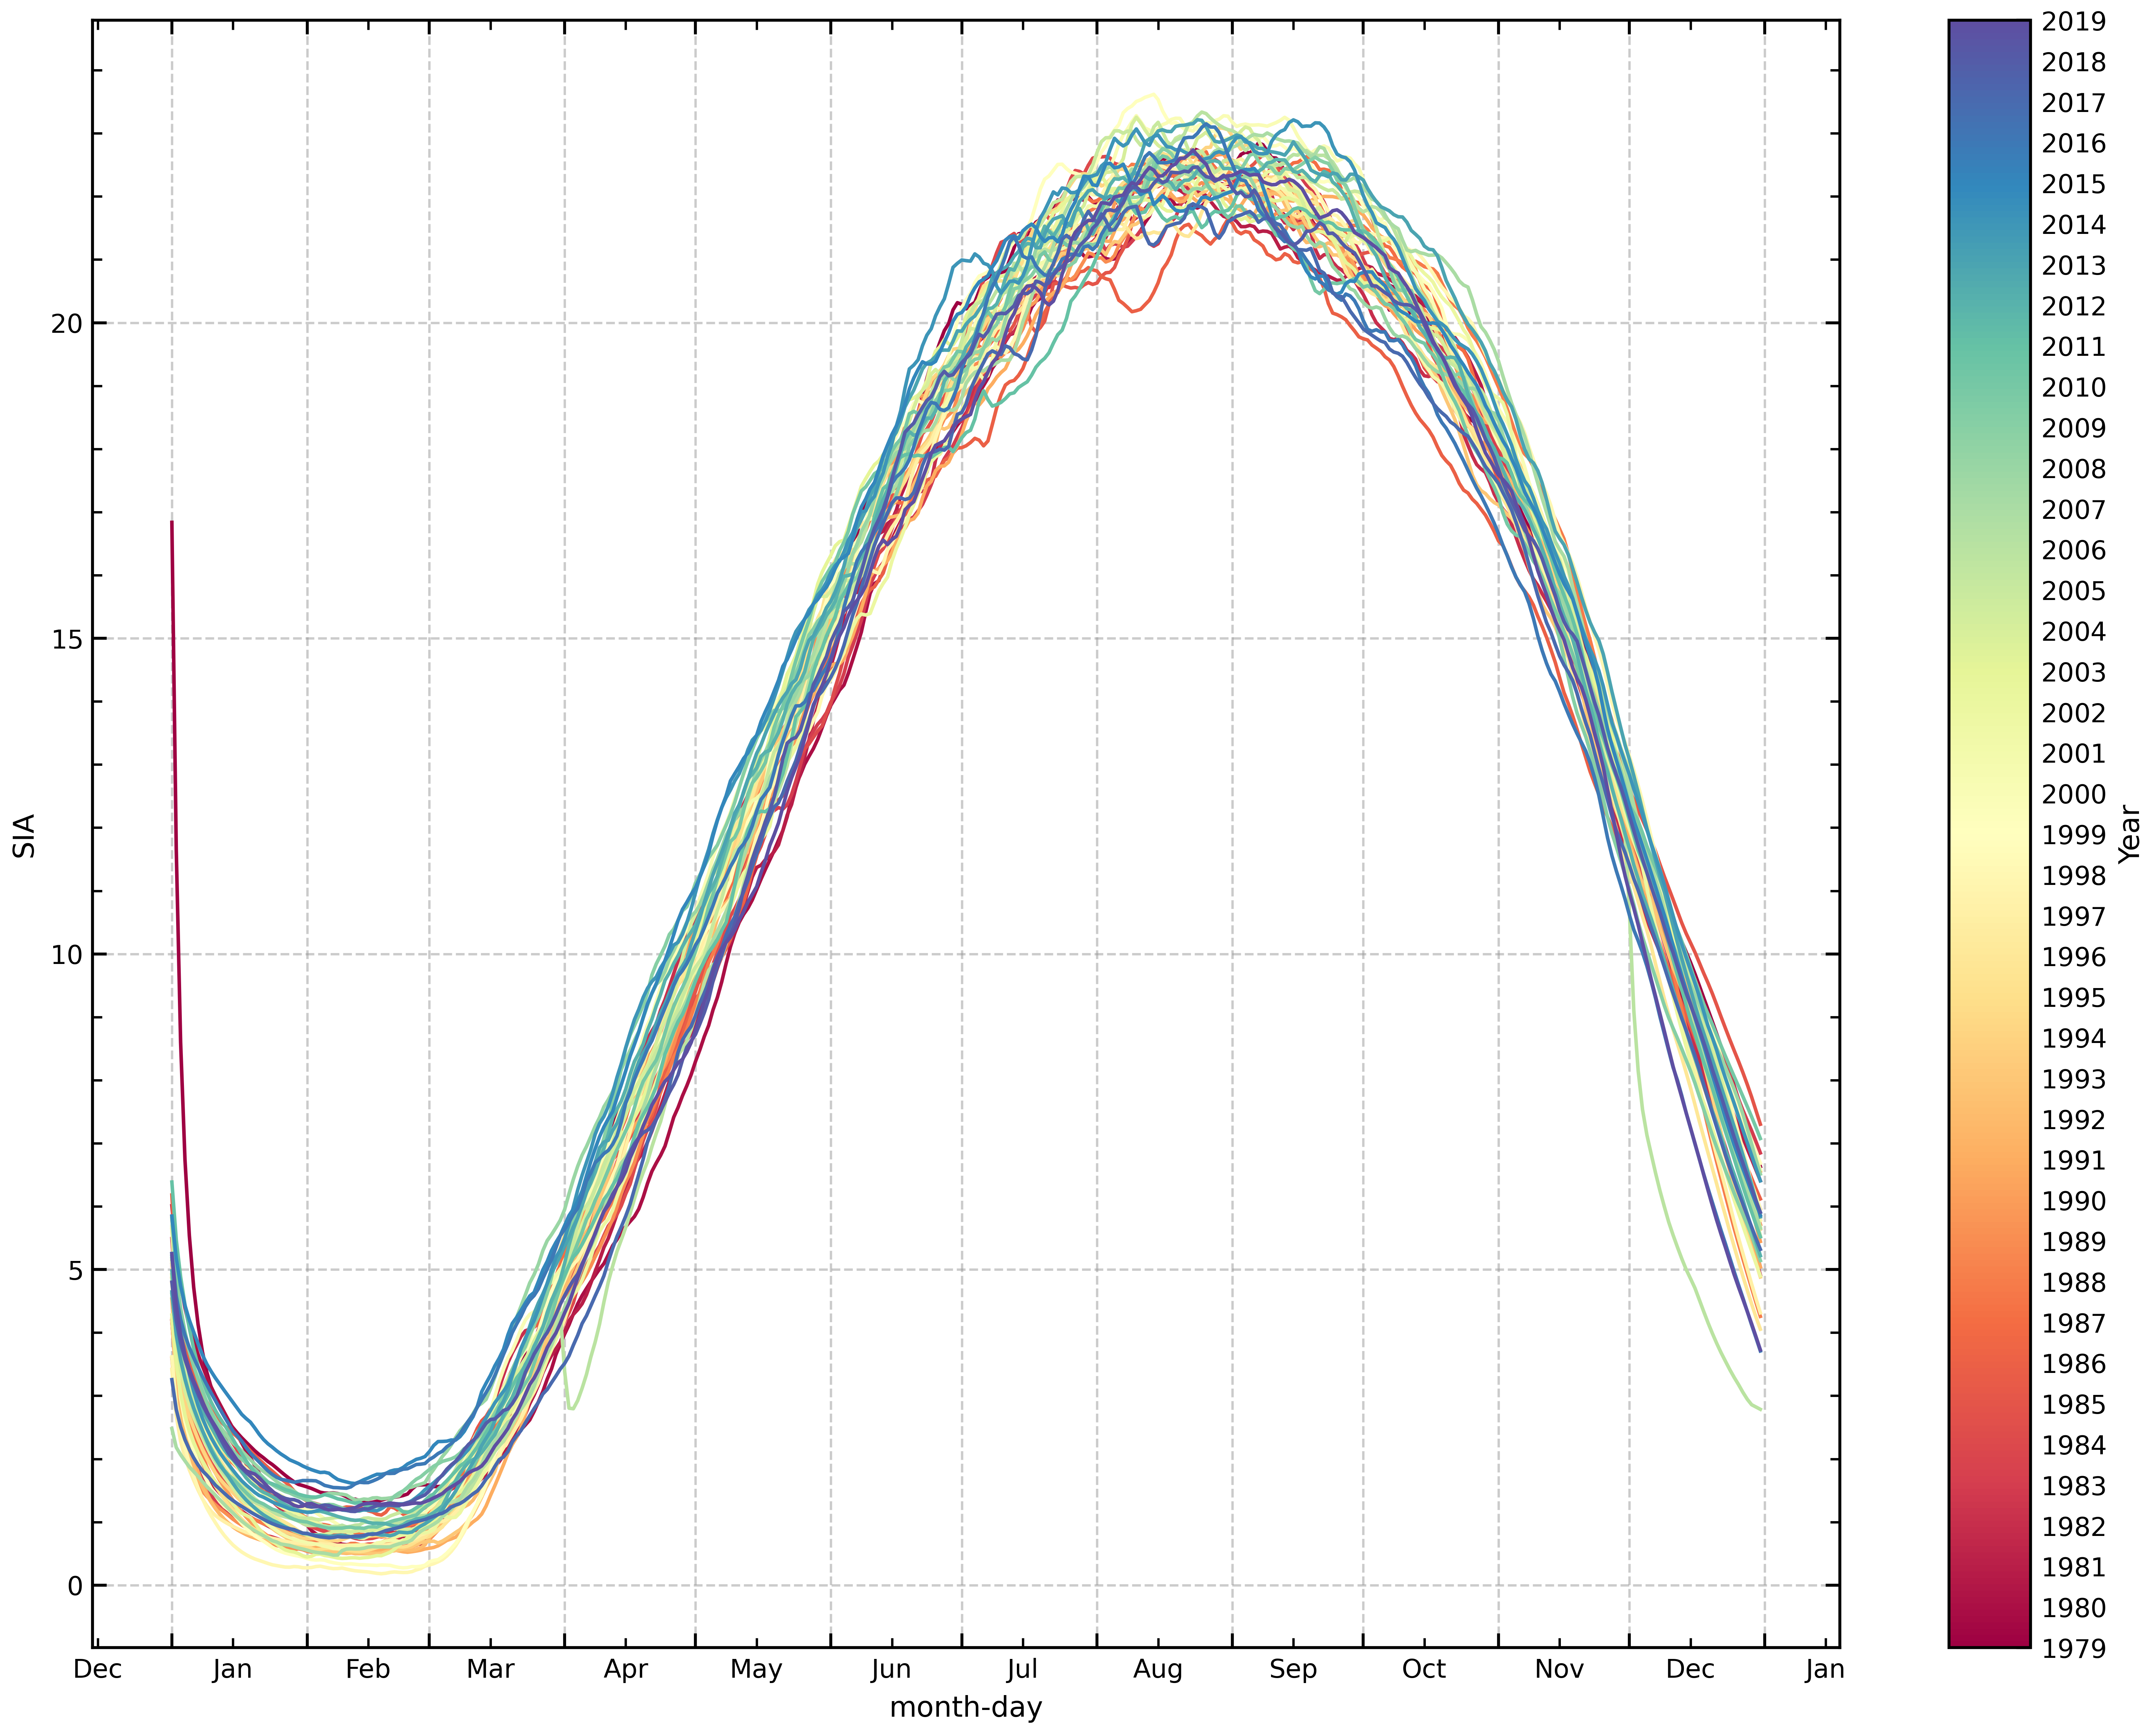

In [33]:
#savepath = '/g/data/ia40/sea-ice-classification/dataframes/'
#savefilename = 'SIA_ts_1998_2019.csv'
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIA_ts_1979_2019_1deg.csv') 

fig = plt.figure(figsize=[width*2, height*2])
ax = fig.add_subplot(1, 1, 1)
#sns.color_palette("viridis", as_cmap=True)
sns.lineplot(ax=ax, x=df["month-day"], y=df["SIA"], hue = year_vec, linestyle = '-',
             errorbar=None, legend=False, palette='Spectral' #color = COLOR_MIZ
              )

cbar = ax.figure.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=year_vec.min(),
                                                                          vmax=year_vec.max(),
                                                                          clip=False),
                                                cmap='Spectral'),
                          ticks=np.arange(year_vec.min(), year_vec.max() + 1),
                          label=r'Year')

set_ax_date(ax, plot_type="clim")
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_ts_years_1deg.png', dpi = 300) 

In [51]:
#datetime(df["date"][-365:], format='%Y-%m-%d')

datetime_object = datetime.strptime(df["date"][-365:].values, '%Y-%m-%d')

TypeError: strptime() argument 1 must be str, not numpy.ndarray

In [55]:
#df["date"][-365:].values



DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq=None)

/jobfs/93184647.gadi-pbs/ipykernel_1588190/2487826623.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=ax, x=dates_df, y=df["SIA"][-730:-365], linestyle = '-',
/jobfs/93184647.gadi-pbs/ipykernel_1588190/2487826623.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(ax=ax, x=dates[-530:-90], y=SIE_NSIDC[-530:-90], linestyle = '-',


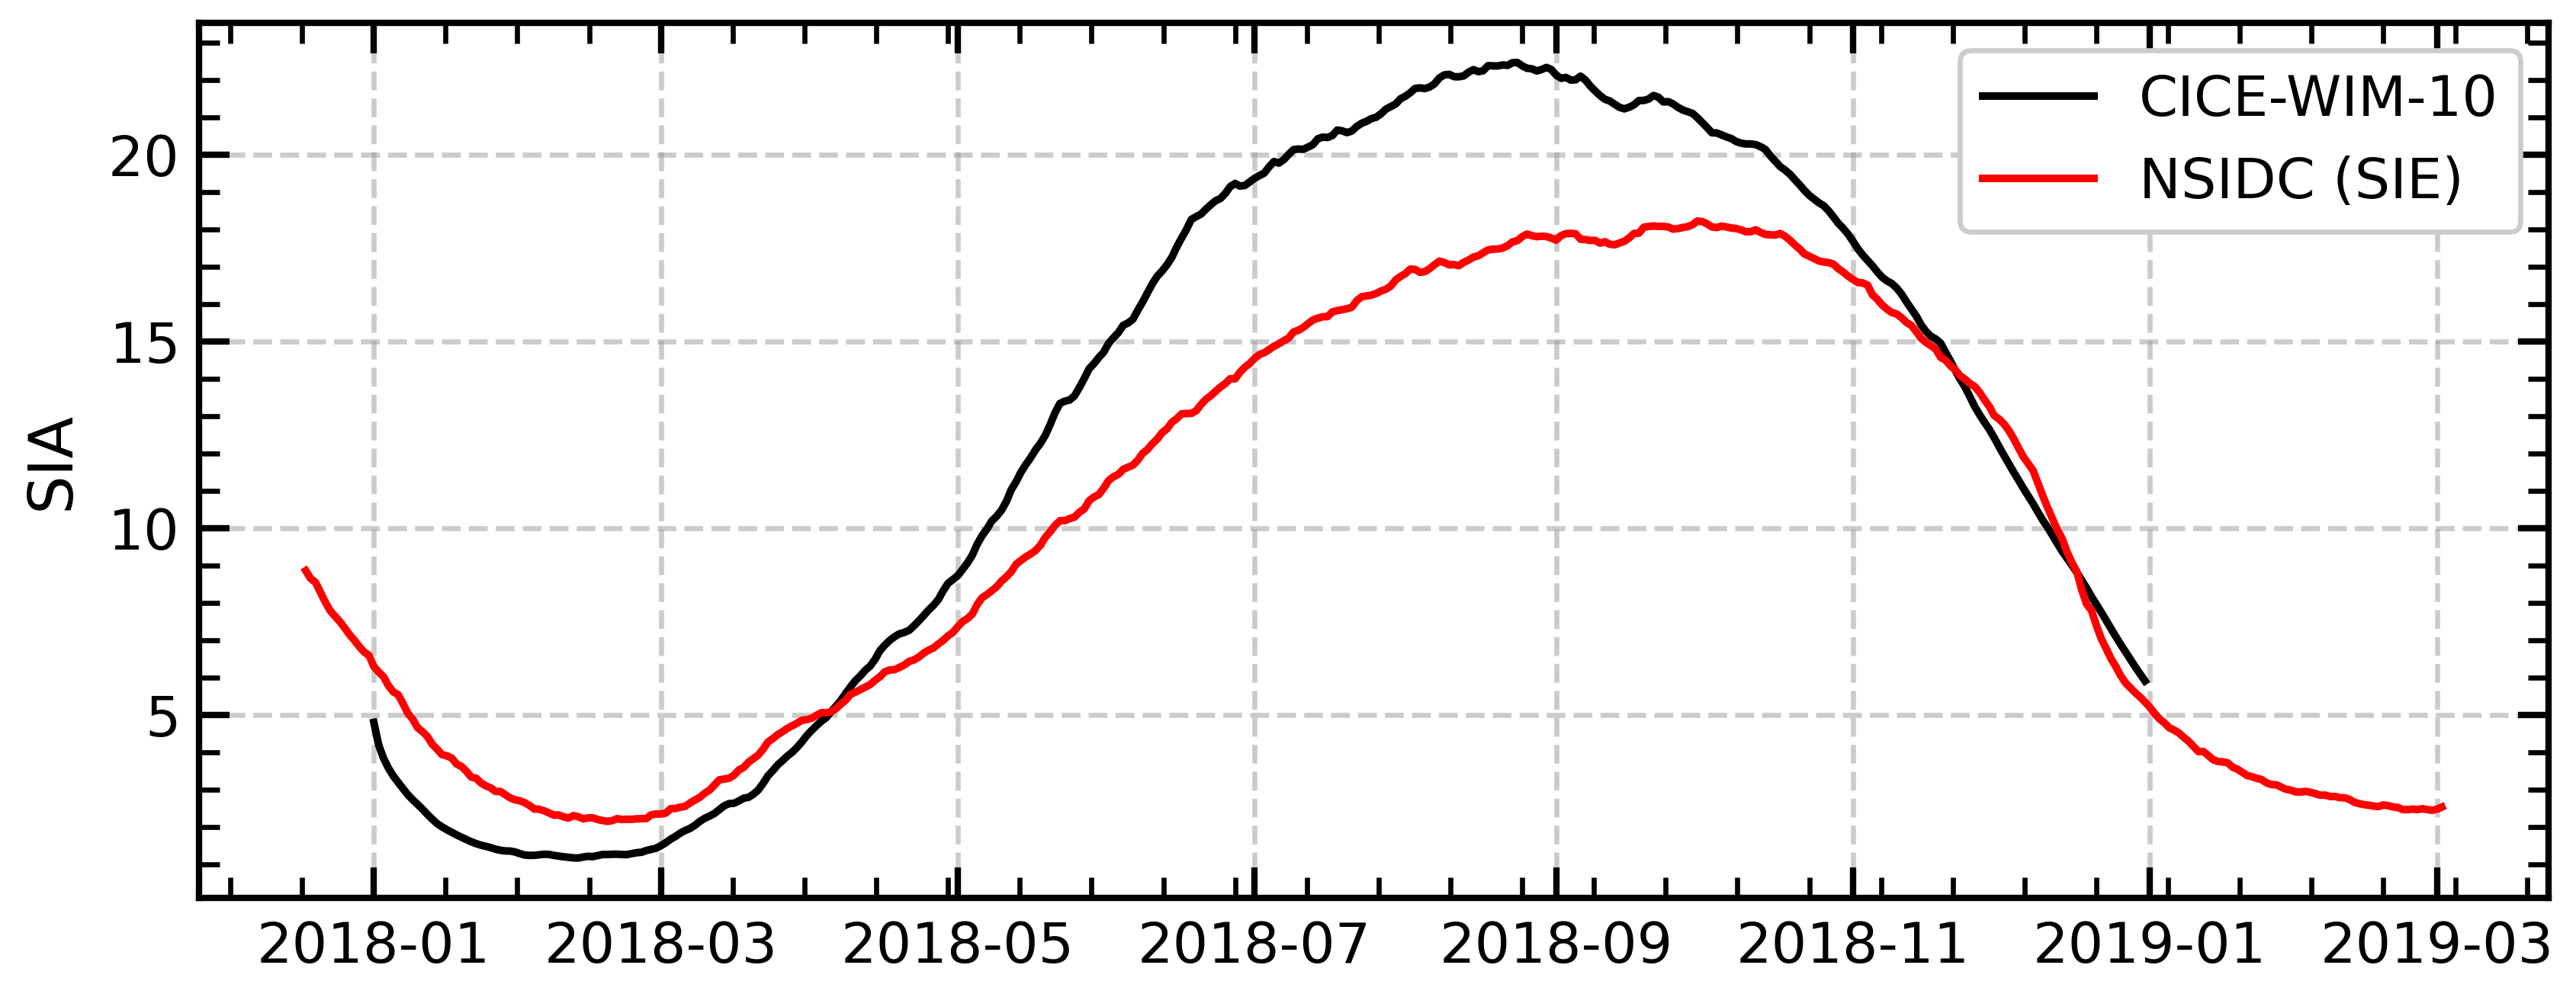

In [62]:
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/SIA_ts_1979_2019_1deg.csv') 

fig = plt.figure(figsize=[width, height/2])
ax = fig.add_subplot(1, 1, 1)
#sns.color_palette("viridis", as_cmap=True)

dates_df = pd.to_datetime(df["date"][-730:-365].values)
sns.lineplot(ax=ax, x=dates_df, y=df["SIA"][-730:-365], linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'CICE-WIM-10', #color = COLOR_MIZ
              )
sns.lineplot(ax=ax, x=dates[-530:-90], y=SIE_NSIDC[-530:-90], linestyle = '-',
             errorbar=None, legend=True, palette='Spectral', label = 'NSIDC (SIE)', #color = COLOR_MIZ
              )
savepath = '/home/566/nd0349/notebooks/figures/'
plt.savefig(savepath+'sia_vs_NSIDC_sie.png', dpi = 300) 

# Maps to diagnose discontinuties

In [ ]:
mypath = '/g/data/ia40/cice-dirs/runs/waves-025/history/'
year = 2015
filename = mypath + 'iceh.' + str(year) + '-05-31.nc'
COLOR = 'black'

ds = xr.open_dataset(filename)
fig = plt.figure(figsize=[width, height/2])
ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.SouthPolarStereo())

var = 'aice'
ax1 = create_map_axis(ax=ax1, LN=LN, LT=LT, land_mask=land_mask, draw_labels="left", textcolor=COLOR)
cs = ax1.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice, vmin=0, vmax=1)#, norm = colors.Norm(vmin=0, vmax=1))
#pos1 = ax1.get_position()
fig.colorbar(cs, ax=ax1)
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([pos1.x0 + pos1.width + 0.05, pos1.y0, pos1.height/20, pos1.height])
#cbar = ax1.colorbar(cs, cax=cbar_ax, orientation='vertical', label='Ice concentration [-]')
temp = filename.partition('.')[2]
#fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
ax1.title.set_text(temp.partition('.')[0])

print('ax1 done')
filename = mypath + 'iceh.' + str(year) + '-06-01.nc'
ds = xr.open_dataset(filename)
var = 'aice'
ax2 = create_map_axis(ax=ax2, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle", textcolor=COLOR)
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice, vmin=0, vmax=1)#
fig.colorbar(cs, ax=ax2)
temp = filename.partition('.')[2]
#fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
ax2.title.set_text(temp.partition('.')[0])
print('ax2 done')

filename = mypath + 'iceh.' + str(year) + '-06-02.nc'
ds = xr.open_dataset(filename)
var = 'aice'
ax2 = create_map_axis(ax=ax3, LN=LN, LT=LT, land_mask=land_mask, draw_labels="middle", textcolor=COLOR)
cs = ax2.pcolormesh(ds['TLON'][:,:],ds['TLAT'][:,:],ds[var][0,:,:],
                    transform=ccrs.PlateCarree(), shading='auto',
                    cmap=cmo.ice, vmin=0, vmax=1)#
fig.colorbar(cs, ax=ax3)
temp = filename.partition('.')[2]
#fig.suptitle(temp.partition('.')[0], fontsize=15, x=0.5, y = 1.01)
ax3.title.set_text(temp.partition('.')[0])
print('ax3 done')



sys.stdout.flush()


plot_dir = '/home/566/nd0349/notebooks'
plt.savefig(plot_dir + '/' + 'waves-025-may-june-maps.png', dpi = 300, transparent=False)
plt.show()
